## K-means

Given n data points and a chosen k number of clusters:
1. choose k cluster locations (centers) at k random points
2. Assign each data points to the closest cluster center
3. compute the cluster centers using the current cluster members
4. if a convergence criterion is not met, loop to point 2.

typical convergence criteria: no (or minimal) reassignment of data points to new cluster centers, or minimal decrease in squared error

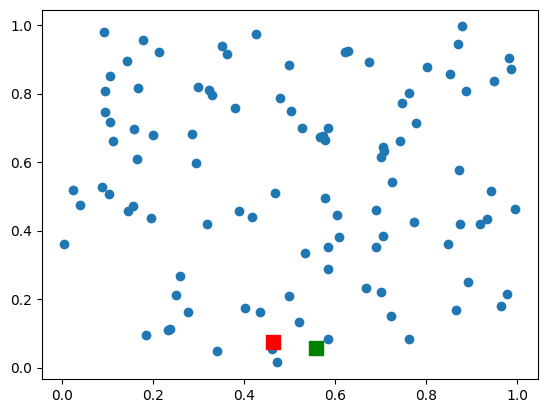

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

X = np.random.rand(100, 2)

plt.scatter(X[:,0], X[:,1])

# generate two centroids (arbitrary positions)
centroid1 = np.random.rand(1, 2)[0]
centroid2 = np.random.rand(1, 2)[0]
plt.scatter(centroid1[0], centroid1[1], color='r', marker='s', s=100)
plt.scatter(centroid2[0], centroid2[1], color='g', marker='s', s=100)

In [31]:
def sort_into_clusters(data, c1, c2):
    c1_points = []
    c2_points = []
    for point in data:
        if distance.euclidean(point, c1) <= distance.euclidean(point, c2):
            c1_points.append(point)
        else:
            c2_points.append(point)
    return np.asarray(c1_points), np.asarray(c2_points)

def plot_result(c1_pts, c2_pts, c1, c2):
    plt.scatter(c1_pts[:,0], c1_pts[:,1], c='r')
    plt.scatter(c2_pts[:,0], c2_pts[:,1], c='g')
    plt.scatter(c1[0], c1[1], color='r', marker='s', s=100)
    plt.scatter(c2[0], c2[1], color='g', marker='s', s=100)

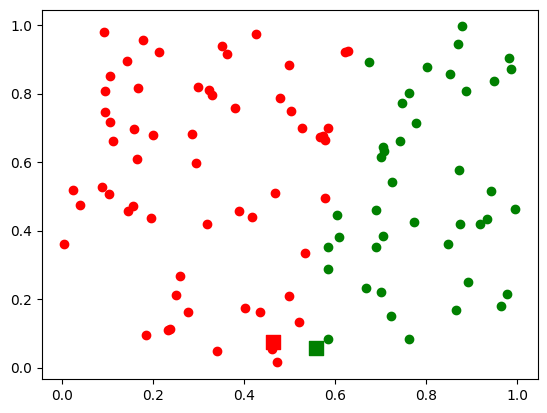

In [32]:
cluster1_points, cluster2_points = sort_into_clusters(X, centroid1, centroid2)
plot_result(cluster1_points, cluster2_points, centroid1, centroid2)

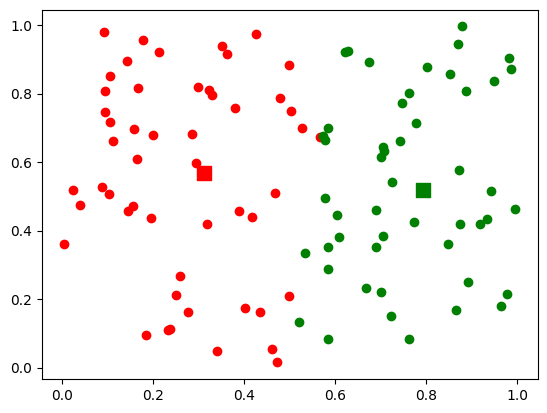

In [33]:
# compute cluster centers
centroid1 = np.mean(cluster1_points, axis=0)
centroid2 = np.mean(cluster2_points, axis=0)
cluster1_points, cluster2_points = sort_into_clusters(X, centroid1, centroid2)
plot_result(cluster1_points, cluster2_points, centroid1, centroid2)

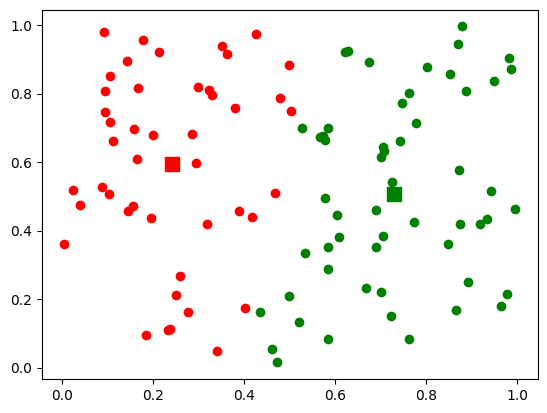

In [35]:
# compute cluster centers
for i in range(1000):
    centroid1 = np.mean(cluster1_points, axis=0)
    centroid2 = np.mean(cluster2_points, axis=0)
    cluster1_points, cluster2_points = sort_into_clusters(X, centroid1, centroid2)
plot_result(cluster1_points, cluster2_points, centroid1, centroid2)